### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
# Prevents rows from being truncated 
pd.options.display.max_columns = None
pd.options.display.max_rows = None


### Import Data 

In [3]:
df = pd.read_csv('car_data_cleaned.csv')

In [4]:
df.head(20)

,Year,Model,Mileage,Location,Price,Site Price Type,Color Scheme,History,335i_yn,xdrive_yn,is_model_yn,body_style,car_color,interior_color,accident,num_owners,State
0,2011,335is Convertible,"62,515","Somerset, NJ","$25,999",High Price,"Silver exterior, Black interior","No accidents, 3 Owners, Personal use",yes,no,yes,E92,Silver,Black,No,3,NJ
1,2011,335i xDrive Coupe AWD,"37,739","Easton, PA","$25,998",Excellent Price,"White exterior, Brown interior","No accidents, 2 Owners, Personal use",yes,yes,no,E92,White,Brown,No,2,PA
2,2011,335i Sedan,"67,840","Stroudsburg, PA","$18,990",Great Price,"Blue exterior, Brown interior","No accidents, 5 Owners, Fleet use",yes,no,no,E90,Blue,Brown,No,5,PA
3,2010,335i xDrive Sedan AWD,"128,507","Hasbrouck Heights, NJ","$9,995",Excellent Price,"Black exterior, Beige interior","No accidents, 3 Owners, Personal use",yes,yes,no,E90,Black,Beige,No,3,NJ
4,2011,335i Convertible,"55,578","Easton, PA","$23,998",High Price,"Black exterior, Unknown interior","No accidents, 2 Owners, Personal use",yes,no,no,E92,Black,Unknown,No,2,PA
5,2011,335i Convertible,"71,447","Stroudsburg, PA","$21,990",High Price,"Black exterior, Brown interior","No accidents, 6 Owners, Personal use",yes,no,no,E92,Black,Brown,No,6,PA
6,2010,335i Convertible,"74,799","Stroudsburg, PA","$18,990",High Price,"Black exterior, Black interior","No accidents, 3 Owners, Personal use",yes,no,no,E92,Black,Black,No,3,PA
7,2011,335is Convertible,"40,262","Stroudsburg, PA","$28,990",High Price,"Blue exterior, Black interior","No accidents, 3 Owners, Personal use",yes,no,yes,E92,Blue,Black,No,3,PA
8,2011,335i xDrive Coupe AWD,"34,908","Jersey City, NJ","$19,998",Excellent Price,"Blue exterior, Unknown interior","No accidents, 2 Owners, Personal use",yes,yes,no,E92,Blue,Unknown,No,2,NJ
9,2008,335i Convertible,"137,855","Huntingdon Valley, PA","$11,295",High Price,"Black exterior, Beige interior","No accidents, 5 Owners, Personal use",yes,no,no,E92,Black,Beige,No,5,PA


In [5]:
# Do interior and exterior colors influence price

### Removing '$' and ',' from Price amd ',' from Mileage for EDA

In [6]:
df['Price'] = df['Price'].apply(lambda x: x.replace(',', '').replace('$',''))

In [7]:
df['Mileage'] = df['Mileage'].apply(lambda x: x.replace(',', ''))

### Convert 'Mileage' and 'Price' from object to int

In [8]:
df['Mileage'] = df['Mileage'].astype(int)

In [9]:
df['Price'] = df['Price'].astype(int)

### Preping variables for EDA

In [10]:
df['high_mileage'] = df['Mileage'].apply(lambda x: 'yes' if x > 120000 else 'no')

In [11]:
df['low_mileage'] = df['Mileage'].apply(lambda x: 'yes' if x < 80000 else 'no')

In [12]:
df['many_owners'] = df['num_owners'].apply(lambda x: 'yes' if x >= 3 else 'no')

In [13]:
df['highmiles_int'] = df['high_mileage'].map(dict(yes=1, no=0))

In [14]:
df['lowmiles_int'] = df['low_mileage'].map(dict(yes=1, no=0))

In [15]:
df['xdrive'] = df['xdrive_yn'].map(dict(yes=1, no=0))

In [16]:
df['is_model'] = df['is_model_yn'].map(dict(yes=1, no=0))

In [17]:
df['accident_int'] = df['accident'].map(dict(Yes=1, No=0))

In [18]:
df = df.drop(['335i_yn','History', 'Color Scheme'], axis=1)

In [19]:
df.head(50)

,Year,Model,Mileage,Location,Price,Site Price Type,xdrive_yn,is_model_yn,body_style,car_color,interior_color,accident,num_owners,State,high_mileage,low_mileage,many_owners,highmiles_int,lowmiles_int,xdrive,is_model,accident_int
0,2011,335is Convertible,62515,"Somerset, NJ",25999,High Price,no,yes,E92,Silver,Black,No,3,NJ,no,yes,yes,0,1,0,1,0
1,2011,335i xDrive Coupe AWD,37739,"Easton, PA",25998,Excellent Price,yes,no,E92,White,Brown,No,2,PA,no,yes,no,0,1,1,0,0
2,2011,335i Sedan,67840,"Stroudsburg, PA",18990,Great Price,no,no,E90,Blue,Brown,No,5,PA,no,yes,yes,0,1,0,0,0
3,2010,335i xDrive Sedan AWD,128507,"Hasbrouck Heights, NJ",9995,Excellent Price,yes,no,E90,Black,Beige,No,3,NJ,yes,no,yes,1,0,1,0,0
4,2011,335i Convertible,55578,"Easton, PA",23998,High Price,no,no,E92,Black,Unknown,No,2,PA,no,yes,no,0,1,0,0,0
5,2011,335i Convertible,71447,"Stroudsburg, PA",21990,High Price,no,no,E92,Black,Brown,No,6,PA,no,yes,yes,0,1,0,0,0
6,2010,335i Convertible,74799,"Stroudsburg, PA",18990,High Price,no,no,E92,Black,Black,No,3,PA,no,yes,yes,0,1,0,0,0
7,2011,335is Convertible,40262,"Stroudsburg, PA",28990,High Price,no,yes,E92,Blue,Black,No,3,PA,no,yes,yes,0,1,0,1,0
8,2011,335i xDrive Coupe AWD,34908,"Jersey City, NJ",19998,Excellent Price,yes,no,E92,Blue,Unknown,No,2,NJ,no,yes,no,0,1,1,0,0
9,2008,335i Convertible,137855,"Huntingdon Valley, PA",11295,High Price,no,no,E92,Black,Beige,No,5,PA,yes,no,yes,1,0,0,0,0


### Average cost of N54 335I's
#### E90 - \$14,000
#### E92 - \$21,000

In [20]:
pd.pivot_table(df,index=['body_style'], values=['Price'])

,Price
body_style,
E90,14161.333333
E92,21623.300000


### Average cost of high mileage cars \(more then 120,000 mi)

#### High mileage E90's: \$9,995

#### High mileage E92's: \$11,295

In [21]:
pd.pivot_table(df,index=['body_style','high_mileage'], values=['Price'])

Price
body_style high_mileage              
E90        no            16244.500000
           yes            9995.000000
E92        no            22770.888889
           yes           11295.000000

### Average cost of low mileage cars (Less then 80,000 miles)

#### Low mileage E90's: \$18,990

#### Low mileage E92's: \$22,770

In [22]:
pd.pivot_table(df,index=['body_style','low_mileage'], values='Price')

Price
body_style low_mileage           
E90        no           11747.000
           yes          18990.000
E92        no           14640.000
           yes          23369.125

### All-Wheel drive cars vs non all wheel drive

In [23]:
pd.pivot_table(df,index='xdrive_yn', values='Price').sort_values('Price', ascending = False)

,Price
xdrive_yn,
no,20272.600000
yes,18663.666667


### 335is cost compared to regular models

#### Average cost of 335is: \$27,500

In [24]:
pd.pivot_table(df, index='is_model_yn', values='Price').sort_values('Price', ascending = False)

,Price
is_model_yn,
yes,27494.500000
no,18520.727273


In [25]:
df['is_model_yn'].value_counts()

no     330
yes     60
Name: is_model_yn, dtype: int64

### Interior price signifance

#### Beige interior colored cars cost less in comparison to brown and black interior colored cars by roughly \$7,000

In [26]:
pd.pivot_table(df, index='interior_color', values='Price').sort_values('Price', ascending = False)


,Price
interior_color,
Black,24659.666667
Brown,21992.000000
Unknown,19165.000000
Beige,13091.666667


In [27]:
df.interior_color.value_counts()

 Brown       120
 Black        90
 Beige        90
 Unknown      90
Name: interior_color, dtype: int64

### Exterior price signifance

#### Black cars cost the least out of all cars

In [28]:
pd.pivot_table(df, index='car_color', values='Price').sort_values('Price', ascending = False)

,Price
car_color,
Silver,25999.000000
White,25998.000000
Blue,21490.750000
Black,17876.333333
Unknown,13499.000000


### Signifance of price and number of owners

In [29]:
pd.pivot_table(df, index=['many_owners'], values=['Price'])

,Price
many_owners,
no,21994.750000
yes,18970.888889


### Accident vs no accident history

In [30]:
pd.pivot_table(df, index='accident', values=['Price'])

,Price
accident,
No,20061
Yes,17985


colors

## Graphs

Text(0.5, 0, 'Body Style')

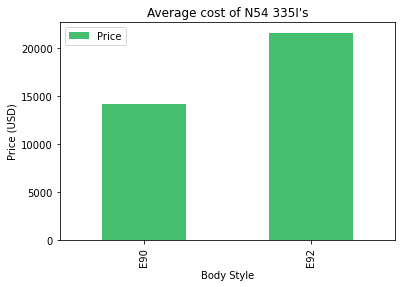

In [31]:
avg_cost_graph = pd.pivot_table(df,index=['body_style'], values=['Price'])

my_cmap = plt.get_cmap("viridis")

avg_cost_graph.plot(kind='bar', title='Average cost of N54 335I\'s',stacked=True, color = my_cmap.colors[180])

plt.ylabel('Price (USD)')

plt.xlabel('Body Style')

### Seaborn version

In [32]:
sns.set_theme(style='whitegrid')

Text(0.5, 1.0, 'Average N54 Prices')

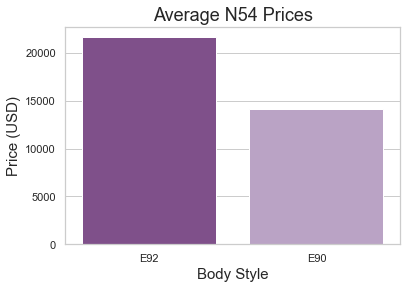

In [33]:
sns.set_palette('PRGn')

price_graph = sns.barplot(data=df, x='body_style', y='Price', ci = None)

price_graph.set_xlabel("Body Style", fontsize = 15)

price_graph.set_ylabel("Price (USD)", fontsize = 15)

price_graph.set_title("Average N54 Prices", fontsize = 18)

Text(0.5, -0.05, 'Vehicles with 80,000 miles or less')

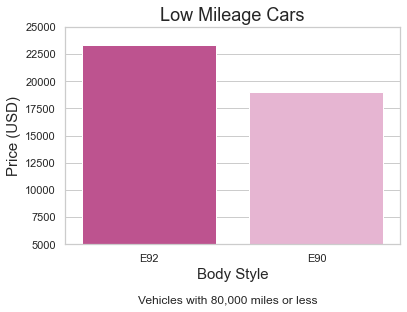

In [83]:
df_low_miles = df[df['low_mileage'] == 'yes']

sns.set_palette('PiYG')

low_miles_graph = sns.barplot(data=df_low_miles, x='body_style', y='Price', ci = None)

low_miles_graph.set_xlabel("Body Style", fontsize = 15)

low_miles_graph.set_ylabel("Price (USD)", fontsize = 15)

low_miles_graph.set_title("Low Mileage Cars", fontsize = 18)

low_miles_graph.set_ylim(5000, 25000)

plt.suptitle("Vehicles with 80,000 miles or less", fontsize=12, y=-0.05)


Text(0.5, -0.05, 'Vehicles with 120,000+ miles')

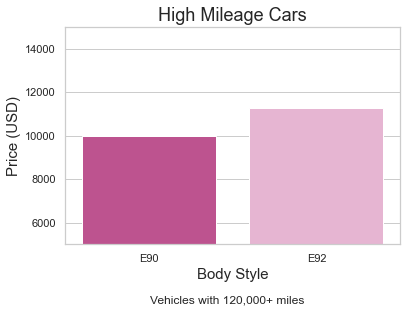

In [84]:
df_high_miles = df[df['high_mileage'] == 'yes']

sns.set_palette("PiYG")

high_miles_graph = sns.barplot(data=df_high_miles, x='body_style', y='Price', ci = None)

high_miles_graph.set_xlabel("Body Style", fontsize = 15)

high_miles_graph.set_ylabel("Price (USD)", fontsize = 15)

high_miles_graph.set_title("High Mileage Cars", fontsize = 18)

high_miles_graph.set_ylim(5000, 15000)

plt.suptitle("Vehicles with 120,000+ miles", fontsize=12, y=-0.05)


Text(0.5, -0.05, 'xDrive equipped vehicles vs rear wheel drive')

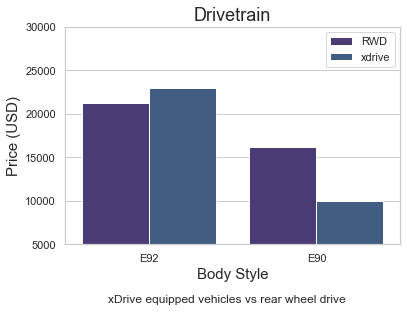

In [86]:
sns.set_palette("viridis")


drivetrain_graph = sns.barplot(data=df,x='body_style', y='Price', 
                               hue='xdrive_yn', ci=None)

drivetrain_graph.set_xlabel("Body Style", fontsize = 15)

drivetrain_graph.set_ylabel("Price (USD)", fontsize = 15)

drivetrain_graph.set_title("Drivetrain", fontsize = 18)

drivetrain_graph.legend(labels=['RWD',
                               'xdrive'])

drivetrain_graph.set_ylim(5000, 30000)

plt.suptitle("xDrive equipped vehicles vs rear wheel drive", fontsize=12, y=-0.05)


Text(0.5, -0.05, '335is edition vehicles compared to standard edition cars')

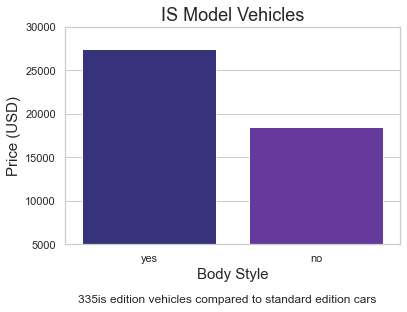

In [112]:
sns.set_palette("CMRmap")


ismodel_graph = sns.barplot(data = df, x='is_model_yn', y='Price', ci = None)

ismodel_graph.set_xlabel("Body Style", fontsize = 15)

ismodel_graph.set_ylabel("Price (USD)", fontsize = 15)

ismodel_graph.set_title("IS Model Vehicles", fontsize = 18)

ismodel_graph.set_ylim(5000, 30000)

plt.suptitle("335is edition vehicles compared to standard edition cars", fontsize=12, y=-0.05)
